# <center>Блок 3. Разведывательный анализ данных.<center>

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale
import statistics
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('C:\IDE\data\wine.csv')

In [3]:
# Задание 4.1
data['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [4]:
# Задание 4.2
data['price'].max()

3300.0

In [5]:
data.head(5)

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [6]:
# Задание 5.2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [7]:
# Задание 5.3
dupl_data = list(data.columns)
mask = data.duplicated(subset=dupl_data)
data_duplicates = data[mask]
print(data_duplicates.shape[0])

data_deduped = data.drop_duplicates(subset=dupl_data)

9983


In [8]:
# Задание 5.4
colls_null_percent = data_deduped.isnull().mean()*100
colls_with_null = colls_null_percent[colls_null_percent>0].sort_values(ascending=False)
display(colls_with_null)

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [9]:
data_deduped['price'].median()

25.0

In [10]:
# Задание 5.5
values = {'price':round(data_deduped['price'].mean()),
          'designation':'unknown',
          'taster_twitter_handle':'unknown',
          'taster_name':'unknown',
          'region_1':'unknown',
          'country':'US',
          'province':'California',
          'variety':'Pinot Noir'}
data_deduped = data_deduped.fillna(values)

data_deduped = data_deduped.drop(['region_2'], axis=1)


In [11]:
df = pd.read_csv('C:\IDE\data\wine.csv')
profile = ProfileReport(df, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
d = dtale.show(df)
d

## <center>EDA-2. Математическая статистика в контексте EDA<center>

### <center>1.Введение<center>

### <center>2.Описательная статистика. Меры центральной тенденции в Python.<center>

In [14]:
clean_data = pd.read_csv('C:\IDE\data\wine_cleared.csv')
clean_data.head(5)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [15]:
# Задание 2.1
clean_data['points'].min()

80

In [16]:
# Задание 2.2
clean_data['price'].min()

4.0

In [17]:
# Задание 2.3
round(statistics.mean(clean_data['price']), 2)

35.36

In [18]:
# Задание 2.4
print(clean_data['price'].sum()/len(clean_data['price'].values))

35.363389129985535


In [19]:
# Задание 2.5
round(statistics.median(clean_data['price']),2)

28.0

In [20]:
# Задание 2.6
print(clean_data['price'].sort_values().median())

28.0


In [21]:
# Задание 2.7
round(statistics.mode(clean_data['price']),2)

35.36

In [22]:
# Задание 2.8
print(clean_data['price'].mode())

0    35.363389
Name: price, dtype: float64


### <center>3.Корреляция<center>

In [23]:
round(clean_data['price'].corr(clean_data['points']),6)

0.402137

### <center>4.Типы корреляций. Корреляция Пирсона.<center>

#### <center>Корреляция Пирсона<center>

In [24]:
import sys
import matplotlib
#matplotlib.use('TkAgg')

In [25]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(clean_data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # распологаем второй рисунок рядом
plt.hist(clean_data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не налезали друг на друга
plt.show()

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_14180\3638414525.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [26]:
plt.subplot(1, 2, 1)
stats.probplot(clean_data['points'], plot=plt)

plt.subplot(1, 2, 2)
plt.hist(clean_data['points'])
plt.tight_layout()
plt.show()

C:\Users\Smoking Shop\AppData\Local\Temp\ipykernel_14180\408322489.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



### <center>5.Типы корреляций. Ранговые корреляции<center>

#### <center>Корреляция Спирмена<center>

In [27]:
# Задание 5.1
round(clean_data['points'].corr(clean_data['price'], method='spearman'), 2)

0.58

#### <center>Корреляция Кендалла<center>

In [28]:
# Задание 5.2
round(clean_data['points'].corr(clean_data['price'], method='kendall'), 2)

0.43

#### <center>Корреляция Мэтьюса<center>

In [29]:
from sklearn.metrics import matthews_corrcoef

In [30]:
x = [+1, -1, +1, +1] # список значений признака x
y = [+1, +1, +1, -1] # список значений признака y
round(matthews_corrcoef(x, y), 2)

-0.33

### <center>6.Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в работе данных.<center>

In [31]:
model_data = pd.read_csv('C:\IDE\data\model.csv')
model_data.head(5)

Month  Year      Waist       Hips     Height      Weight        BMI  \
0  December  1953  24.000000  36.000000  65.000000  118.000000  19.630000   
1   January  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
2  February  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
3     March  1954  24.000000  35.000000  66.000000  118.000000  19.040000   
4     April  1954  23.433172  34.698708  66.057258  114.936066  18.232168   

   Waist/Hip  
0   0.670000  
1   0.677916  
2   0.677916  
3   0.690000  
4   0.677916

#### <center>Матрица корреляций<center>

In [32]:
# Задание 6.1
model_data.corr(numeric_only=True)

Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

#### <center>Тепловая матрица корреляции<center>

In [33]:
sns.heatmap(model_data.corr(numeric_only=True), annot=True)

<Axes: >

#### <center>Scatterplot<center>

In [34]:
sns.scatterplot(data=model_data, x="Waist/Hip", y="Waist")

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

In [35]:
sns.scatterplot(data=model_data, x="Weight", y="Year")

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

#### <center>Граффик попарных отношений pairplot.<center>

In [36]:
sns.pairplot(model_data)

In [37]:
# Задание 6.3
round(model_data['Weight'].corr(model_data['Height']),2)

0.71

### <center>7.Проверка<center>

In [38]:
# Задание 7.1
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [39]:
# Задание 7.2
print(round(statistics.mean(model_data['Height']),2))
print(round(statistics.mean(model_data['Weight']),2))

66.06
114.94


In [40]:
# Задание 7.3
sns.heatmap(model_data.corr(numeric_only=True), annot=True)
sns.pairplot(model_data)

## <center>EDA-3. Проектирование признаков<center>

### <center>1.Введение<center>

### <center>2.Создание признаков<center>

In [41]:
wine_data = pd.read_csv('C:\IDE\data\wine_cleared.csv')
wine_data.head(5)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

#### <center>Разбор даты и времени<center>

#### <center>Разбор числовых величин<center>

In [42]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)

#### <center>Разбор текста<center>

In [43]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)

#### <center>Разбор категорий<center>

In [44]:
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [45]:
# Задание 2.1
wine_data['country'].value_counts(ascending=False)

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [46]:
# Задание 2.2
wine_data['is_france'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_italy'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
print(wine_data['is_france'].sum())
print(wine_data['is_italy'].sum())

22093
19540


In [47]:
# Задание 2.3
wine_data['year'] = wine_data['year'].astype(float)
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if x < 2010 else 0)
print(wine_data['old_wine'].sum())

39781


In [48]:
display(wine_data['title'])

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [49]:
# Задание 2.7
regex = r'(?<=\()[^()]+(?=\))'
wine_data['location'] = wine_data['title'].str.findall(regex).str.get(0)
display(wine_data['location'])

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: location, Length: 129971, dtype: object

### <center>3.Создание признаков. Внешние источники данных<center>
#### <center>Работа с файлами<center>

In [50]:
country_population = pd.read_csv('C:\IDE\data\country_population.csv', sep=';')
display(country_population.head(5))

country     population
0      China  1,411,778,724
1      India  1,386,584,581
2         US    333,022,386
3  Indonesia    271,350,000
4   Pakistan    225,200,000

In [51]:
# Задание 3.1
display(country_population[country_population['country'] == 'Italy'])

country  population
24   Italy  59,097,904

In [52]:
wine_data = wine_data.join(country_population.set_index('country'), on='country')

In [53]:
country_area = pd.read_csv('C:\IDE\data\country_area.csv', sep=';')
display(country_area.head(5))

country        area
0  Russia  17075400.0
1  Canada   9984670.0
2   China   9596960.0
3      US   9372610.0
4  Brazil   8547000.0

In [54]:
wine_data = wine_data.join(country_area.set_index('country'), on='country')

In [55]:
# Задание 3.2
wine_data['area_country'] = wine_data['area']
wine_data = wine_data.drop(['area'], axis=1)
display(round(wine_data[wine_data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area_country']))

94    9372610.0
Name: area_country, dtype: float64

### <center>4.Создание признаков. Работа с форматом "дата-время".<center>

In [56]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns=['client_id', 'agent_date', 'created_at', 'end_date'])

# преобразуем признаки в формат datetime для удобства работы
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [57]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  
0         1  
1       231  
2       104  
3         2  
4       215  
5        95  
6        92  
7       215  
8        94  
9         6

In [58]:
# Задание 4.1
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
print(calls['time_connection'].sum())

89


In [59]:
# Задание 4.2
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [60]:
# Задание 4.3
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
print(calls['time_diff'].sum())

1144


In [61]:
calls = calls.drop(columns=['agent_date', 'created_at', 'end_date'], axis=1)
calls

client_id  duration  time_connection  is_connection  time_diff
0        460         1                5              0          6
1         12       231                2              1        233
2         56       104                0              1        104
3        980         2                7              0          9
4        396       215                1              1        216
5        449        95                5              1        100
6        397        92                2              1         94
7        398       215                0              1        215
8        452        94                1              1         95
9        440         6               66              0         72

In [62]:
# Задание 4.5
wine_data['year'] = wine_data['year'].astype(str)
wine_data['year'] = wine_data['year'].apply(lambda x: x[0:4])
wine_data['year'] = pd.to_datetime(wine_data['year'], errors='coerce')
wine_data['years_diff'] = (pd.to_datetime("2022-01-12") - wine_data['year']).dt.days
print(wine_data['years_diff'].max())

98627.0


### <center>5.Кодирование признаков. Методы<center>

In [63]:
import category_encoders as ce

In [64]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns=['size', 'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

#### <center>Порядковое кодирование. Ordinal Encoding<center>

In [65]:
# создаем обьект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col': 'size',
    'mapping': {'xxs':1, 'xs':2, 's':3, 'm':4, 'l':5, 'xxl':6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

size   type  size
0   xxs  dress     1
1   xxs  skirt     1
2    xs  dress     2
3     s  skirt     3
4     m  dress     4
5     l  shirt     5
6     s   coat     3
7     m   coat     4
8   xxl  shirt     6
9     l  dress     5

#### <center>Однократное кодирование. One-Hot Encoding<center>

In [66]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  size  type_dress  type_skirt  type_shirt  type_coat
0   xxs  dress     1           1           0           0          0
1   xxs  skirt     1           0           1           0          0
2    xs  dress     2           1           0           0          0
3     s  skirt     3           0           1           0          0
4     m  dress     4           1           0           0          0
5     l  shirt     5           0           0           1          0
6     s   coat     3           0           0           0          1
7     m   coat     4           0           0           0          1
8   xxl  shirt     6           0           0           1          0
9     l  dress     5           1           0           0          0

In [67]:
# Задание 5.4
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
taster_bin = encoder.fit_transform(wine_data['taster_name'])
wine_data = pd.concat([wine_data, taster_bin], axis=1)

wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery', 'price_round', 'year', 'is_usa',
       'is_france', 'is_italy', 'old_wine', 'location', 'population',
       'area_country', 'years_diff', 'taster_name_Kerin O’Keefe',
       'taster_name_Roger Voss', 'taster_name_Paul Gregutt',
       'taster_name_Alexander Peartree', 'taster_name_Michael Schachner',
       'taster_name_Anna Lee C. Iijima', 'taster_name_Virginie Boone',
       'taster_name_Matt Kettmann', 'taster_name_unknown',
       'taster_name_Sean P. Sullivan', 'taster_name_Jim Gordon',
       'taster_name_Joe Czerwinski', 'taster_name_Anne Krebiehl MW',
       'taster_name_Lauren Buzzeo', 'taster_name_Mike DeSimone',
       'taster_name_Jeff Jenssen', 'taster_name_Susan Kostrzewa',
       'taster_name_Carrie Dykes', 'taster_name_Fiona Adams',
       'taster_name_Christina Pickard'],
      dty

#### <center>Двоичное кодирование<center>

In [68]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  size  type_dress  type_skirt  type_shirt  type_coat  type_0  \
0   xxs  dress     1           1           0           0          0       0   
1   xxs  skirt     1           0           1           0          0       0   
2    xs  dress     2           1           0           0          0       0   
3     s  skirt     3           0           1           0          0       0   
4     m  dress     4           1           0           0          0       0   
5     l  shirt     5           0           0           1          0       0   
6     s   coat     3           0           0           0          1       1   
7     m   coat     4           0           0           0          1       1   
8   xxl  shirt     6           0           0           1          0       0   
9     l  dress     5           1           0           0          0       0   

   type_1  type_2  
0       0       1  
1       1       0  
2       0       1  
3       1       0  
4       0       1  
5       1       1  
6       0       0  
7       0       0  
8       1       1  
9       0       1

In [69]:
# Задание 5.5
bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(wine_data['country'])
wine_data = pd.concat([wine_data, type_bin], axis=1)
display(type_bin)

country_0  country_1  country_2  country_3  country_4  country_5
0               0          0          0          0          0          1
1               0          0          0          0          1          0
2               0          0          0          0          1          1
3               0          0          0          0          1          1
4               0          0          0          0          1          1
...           ...        ...        ...        ...        ...        ...
129966          0          0          0          1          1          0
129967          0          0          0          0          1          1
129968          0          0          0          1          0          1
129969          0          0          0          1          0          1
129970          0          0          0          1          0          1

[129972 rows x 6 columns]

In [70]:
# Задание 5.8
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = bin_encoder.fit_transform(wine_data['taster_twitter_handle'])
display(type_bin)

taster_twitter_handle_0  taster_twitter_handle_1  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
129966                        0                        0   
129967                        0                        0   
129968                        0                        0   
129969                        0                        0   
129970                        0                        0   

        taster_twitter_handle_2  taster_twitter_handle_3  \
0                             0                        0   
1                             0                        1   
2                             0                        1   
3                             1                        0   
4                             0                        1   
...                         ...                      ...   
129966                        1                        0   
129967                        0                        1   
129968                        0                        1   
129969                        0                        1   
129970                        0                        1   

        taster_twitter_handle_4  
0                             1  
1                             0  
2                             1  
3                             0  
4                             1  
...                         ...  
129966                        0  
129967                        1  
129968                        0  
129969                        0  
129970                        0  

[129972 rows x 5 columns]

In [71]:
# Задание 5.9
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
#df

df_dummies = pd.get_dummies(df, columns=['product', 'payment_type'])
df = pd.concat([df, df_dummies], axis=1)
df

product  price payment_type  price  product_Product1  product_Product2  \
0  Product1   1200   Mastercard   1200              True             False   
1  Product2   3600         Visa   3600             False              True   
2  Product3   7500         Amex   7500             False             False   

   product_Product3  payment_type_Amex  payment_type_Mastercard  \
0             False              False                     True   
1             False              False                    False   
2              True               True                    False   

   payment_type_Visa  
0              False  
1               True  
2              False

### <center>6.Преобразование признаков. Нормализация. Стандартизация<center>
#### <center>Нормализация<center>

In [72]:
import matplotlib.style
import matplotlib_inline
import numpy as np
import pandas as pd
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# генерируем датасет из случайных чисел
df = pd.DataFrame({
    
    # Бета распределение, 5 - значение альфа, 1 - значение бета, 1000 - размер
    'beta': np.random.beta(5, 1, 1000)*60,
    
    # Экспонениальное распределение, 10 - "резкость" экспоненты, 1000 - размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 - среднее значение р., 2- стандартное отклонение, 1000 - количетсво сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 - среднее значение р., 10 - стандартное отклонение, 1000 - количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000)
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
df

beta  exponential   normal_p   normal_l
0    39.273740     2.263890  11.860245   4.748207
1    55.030395    13.108592  11.796582  10.959172
2    47.434682     3.312019  11.146945   3.919227
3    43.173536    17.664301   8.266689  42.072915
4    45.681443     2.109760   5.112983  16.960664
..         ...          ...        ...        ...
995  50.976583     3.748883   7.057497   9.609427
996  46.290172     1.195512   8.419497  14.972852
997  58.912029     7.014868  11.541732  33.654934
998  52.185621     2.391140  11.819914   6.091417
999  40.927732     1.962745  10.170753  13.309039

[1000 rows x 4 columns]

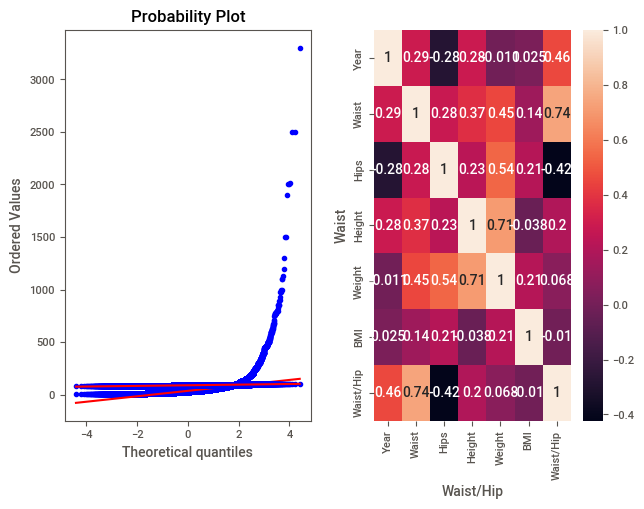

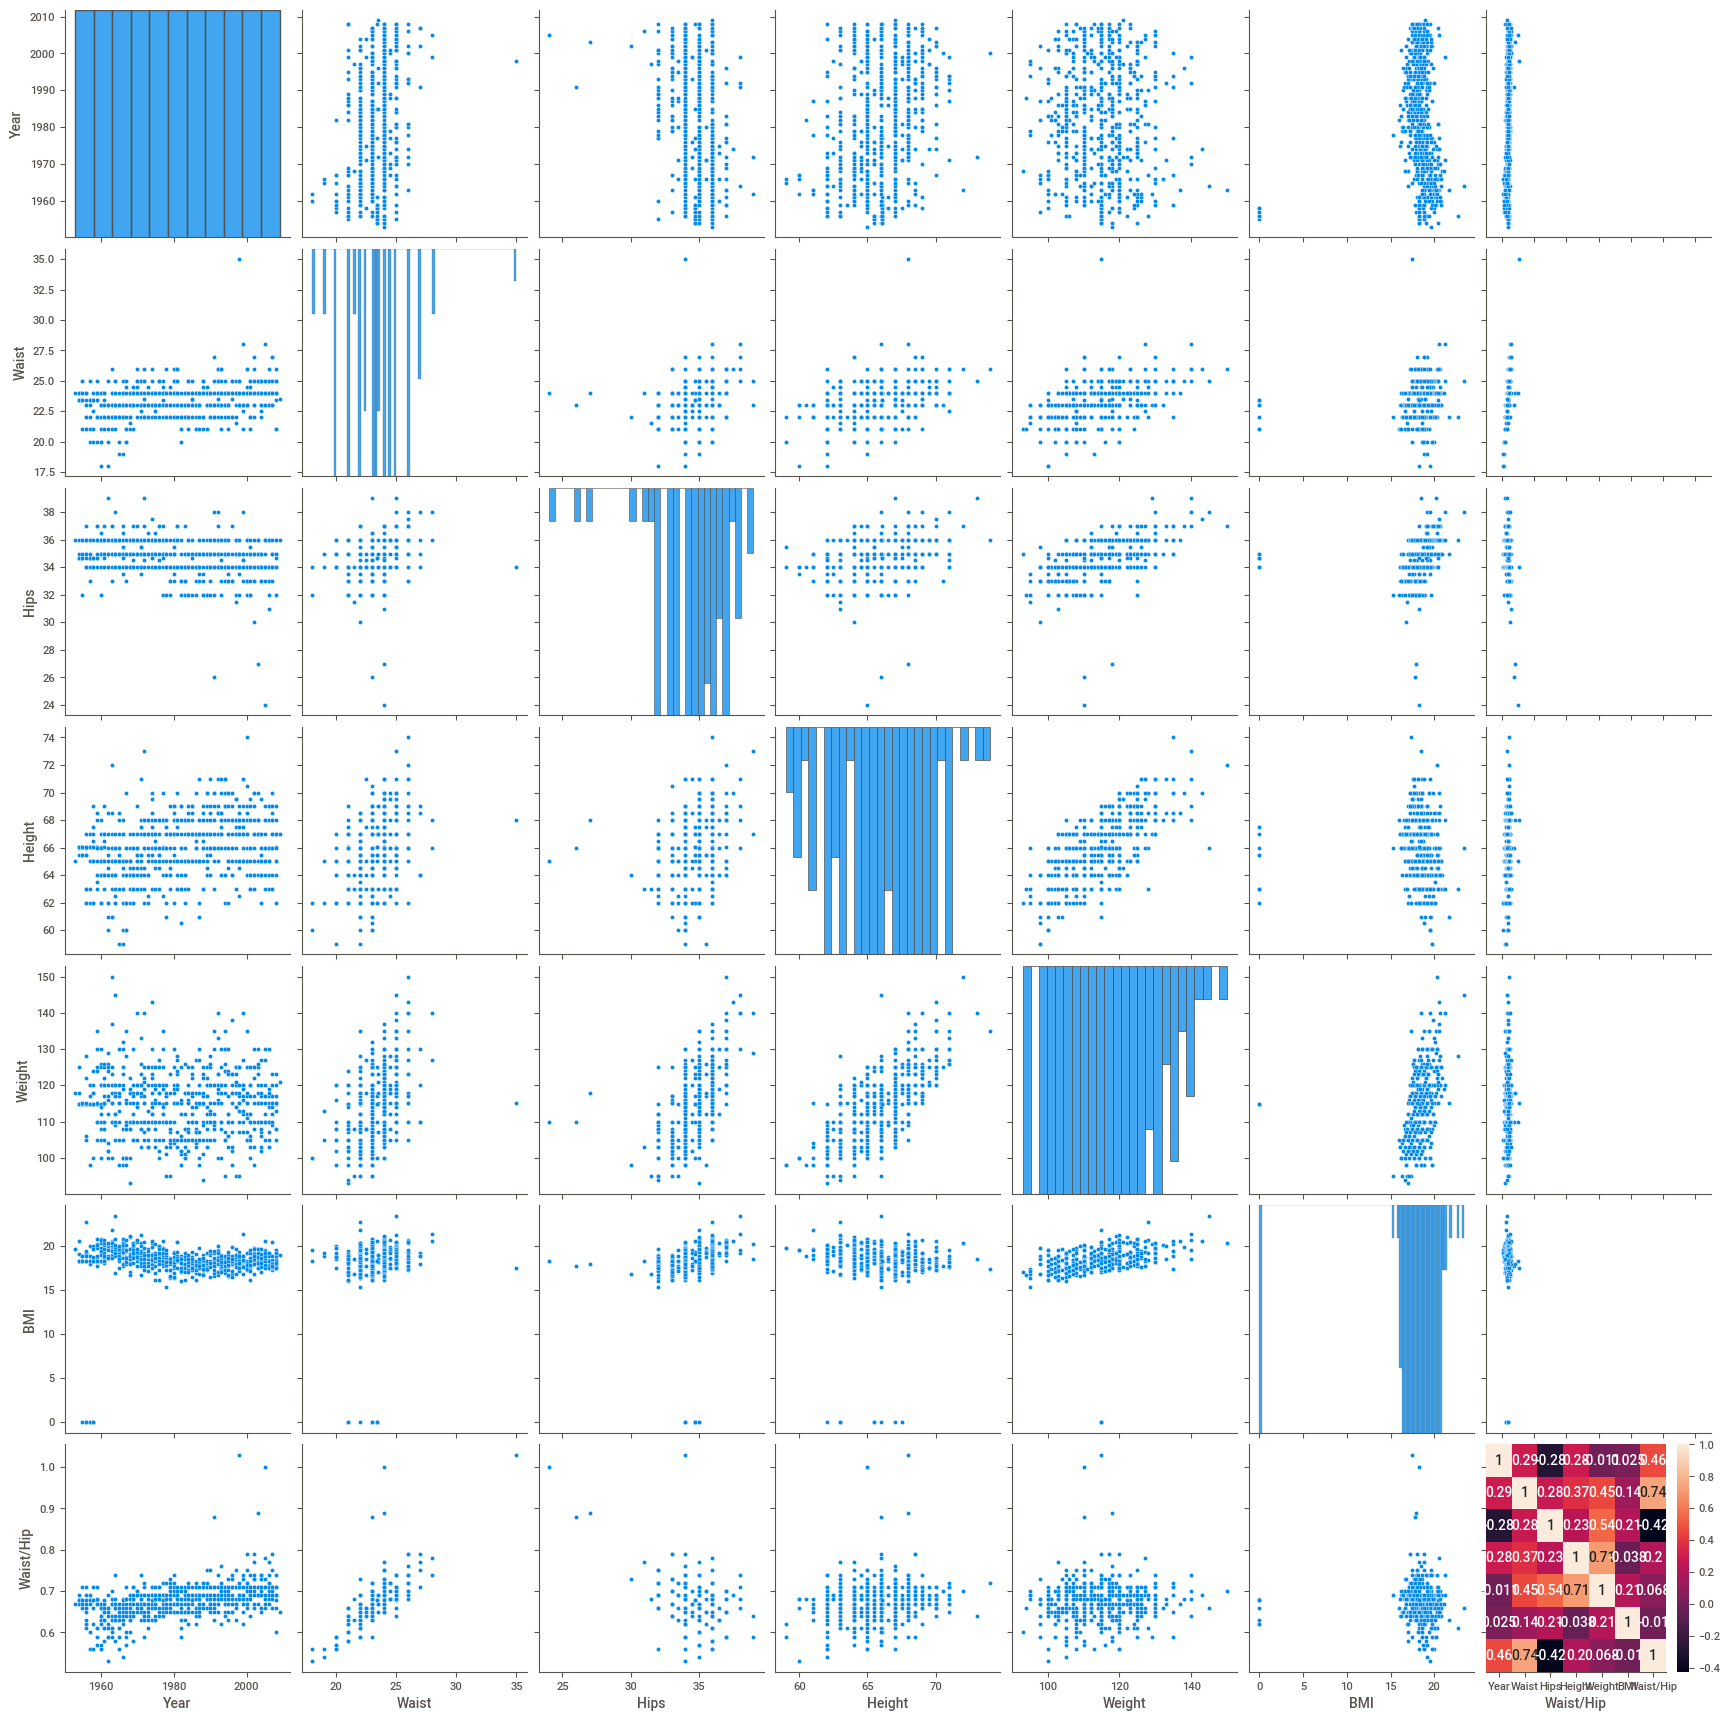

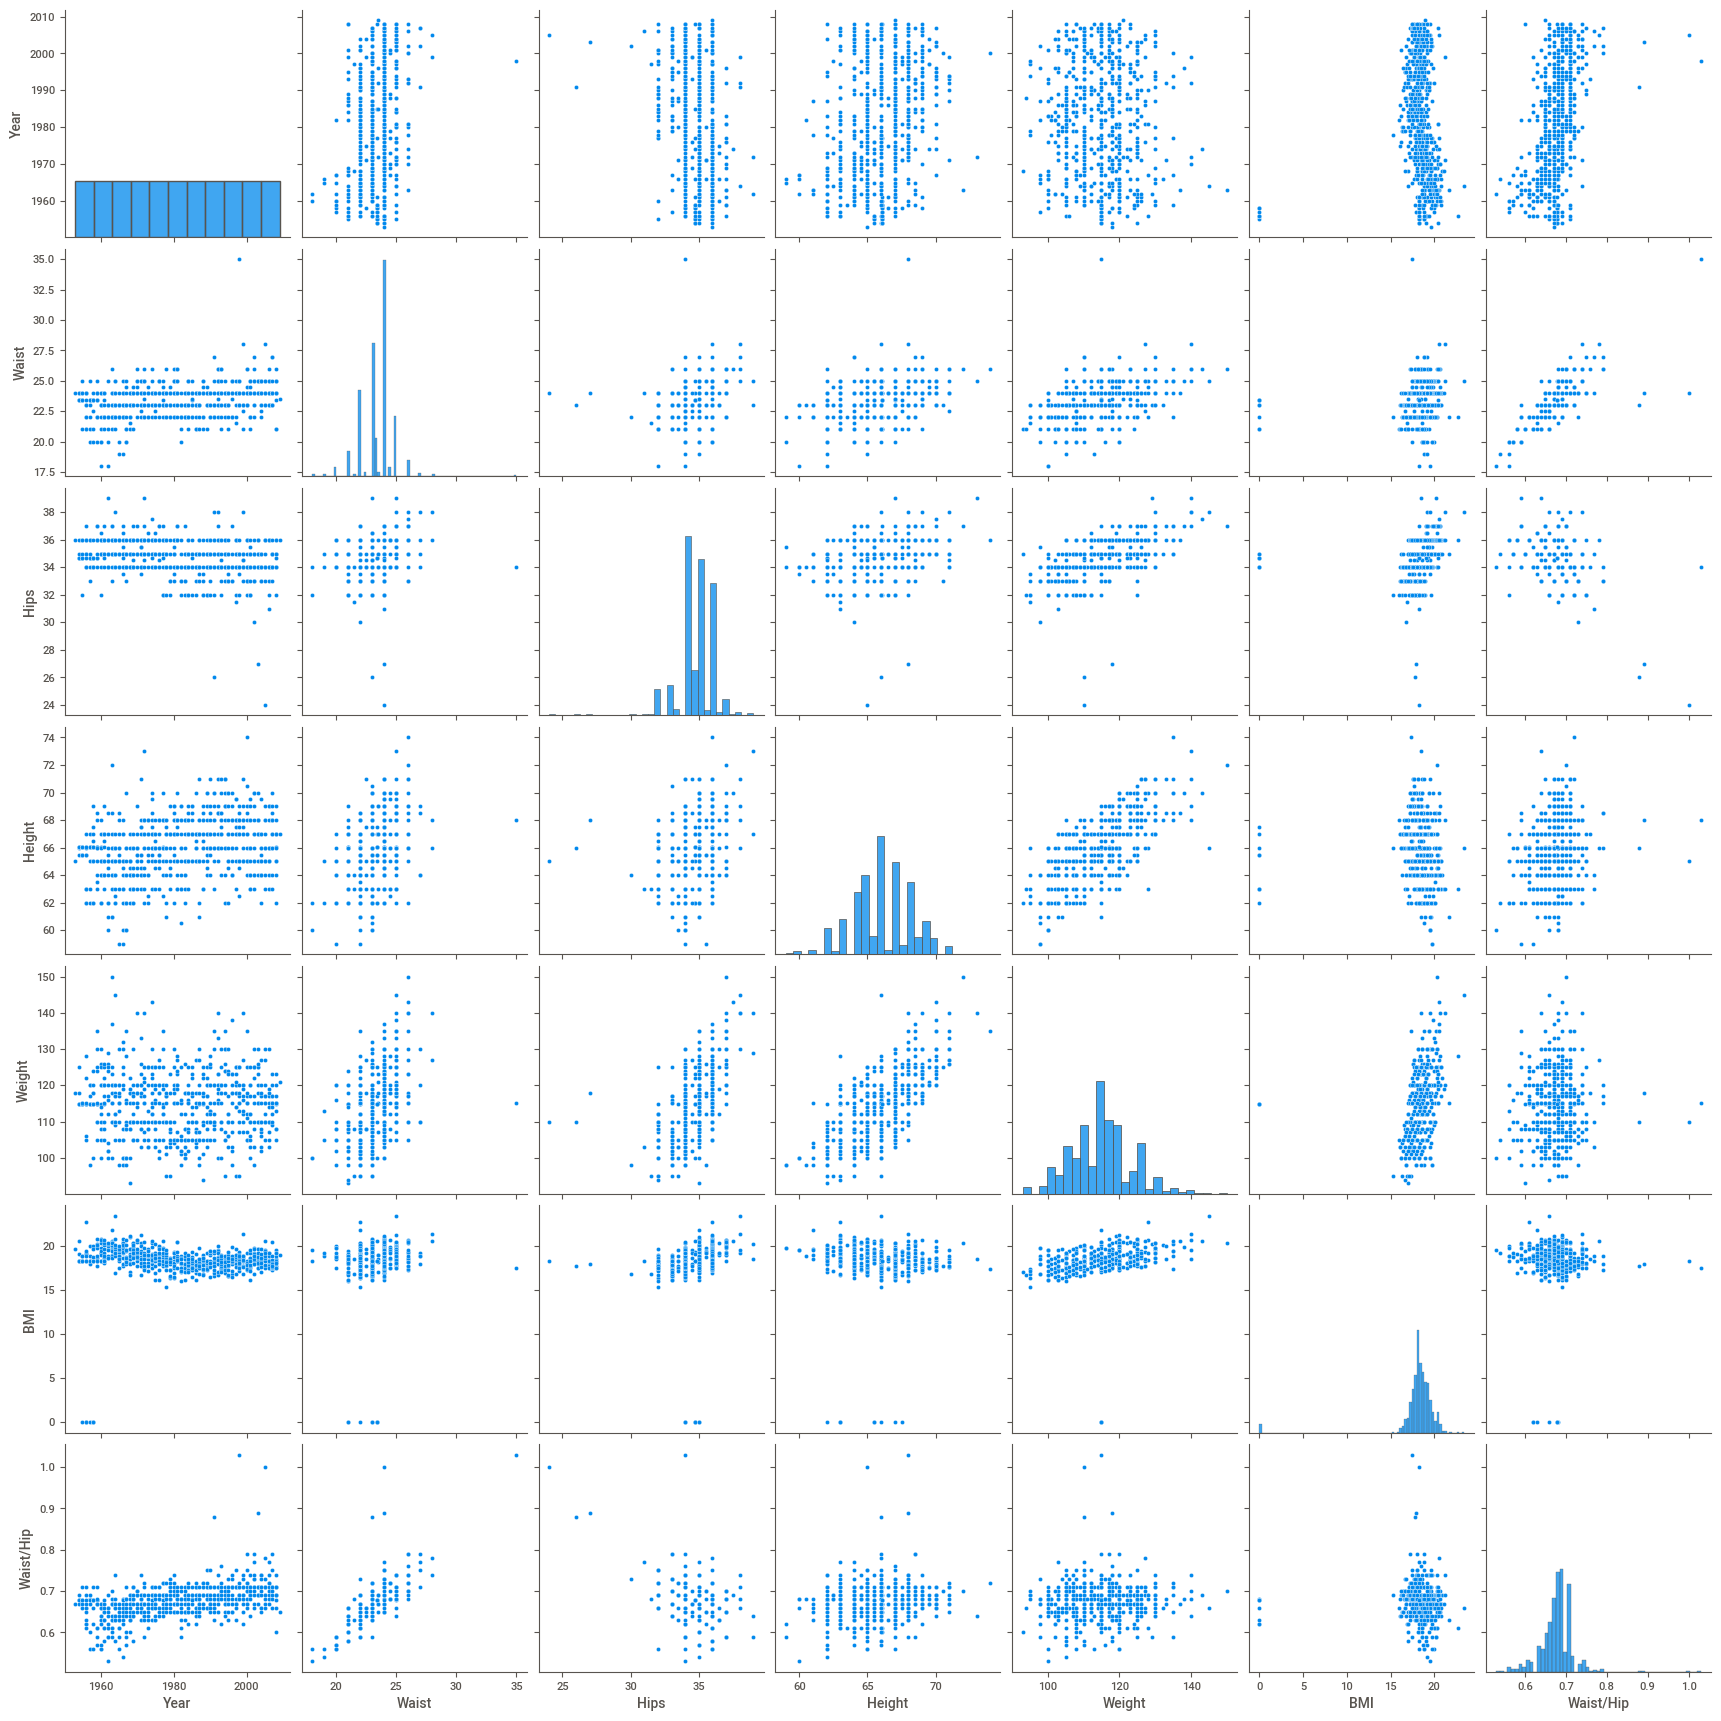

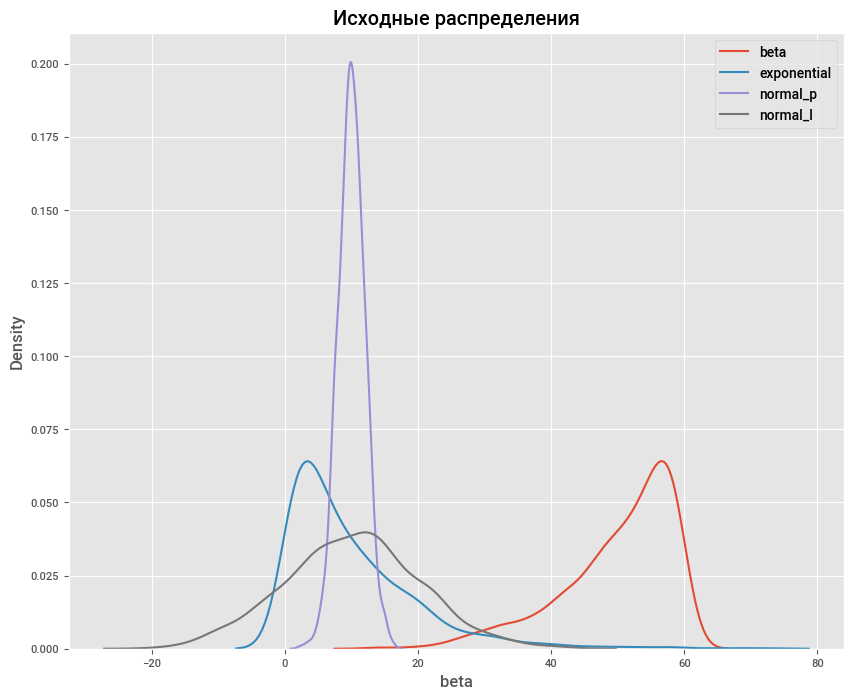

In [73]:
# зададим параметры холста, название и визуализируем кривые распределения
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE - оценка плотности ядра) - специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label='beta')
sns.kdeplot(df['exponential'], ax=ax1, label='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label='normal_l')
plt.legend()

In [74]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

#### <center>MINMAXSCALER<center>

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.783981     0.140471     0.551120     0.482297
std       0.183684     0.136450     0.145334     0.163992
min       0.000000     0.000000     0.000000     0.000000
25%       0.692276     0.041266     0.456837     0.375032
50%       0.834120     0.098280     0.550362     0.484741
75%       0.929157     0.196461     0.645864     0.586810
max       1.000000     1.000000     1.000000     1.000000

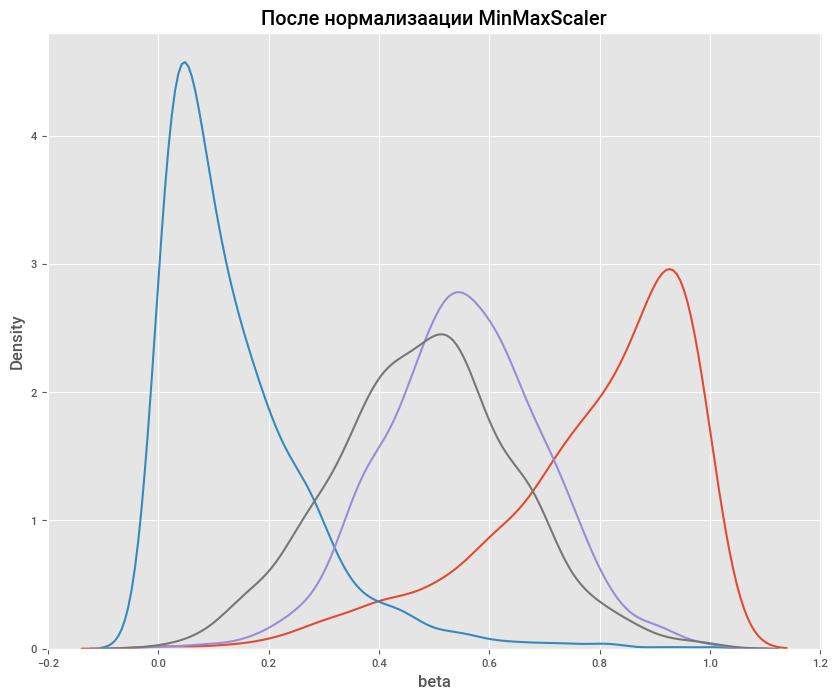

In [75]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()
# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)
# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализаации MinMaxScaler')
sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
df_mm.describe()

#### <center>ROBUSTSCALER<center>

beta   exponential      normal_p     normal_l
count  1.000000e+03  1.000000e+03  1.000000e+03  1000.000000
mean  -2.116639e-01  2.718638e-01  4.011529e-03    -0.011541
std    7.754247e-01  8.792225e-01  7.688570e-01     0.774358
min   -3.521256e+00 -6.332678e-01 -2.911564e+00    -2.288916
25%   -5.987992e-01 -3.673671e-01 -4.947706e-01    -0.518040
50%    3.252607e-16 -4.011548e-17  3.390842e-16     0.000000
75%    4.012008e-01  6.326329e-01  5.052294e-01     0.481960
max    7.002654e-01  5.810261e+00  2.378706e+00     2.433017

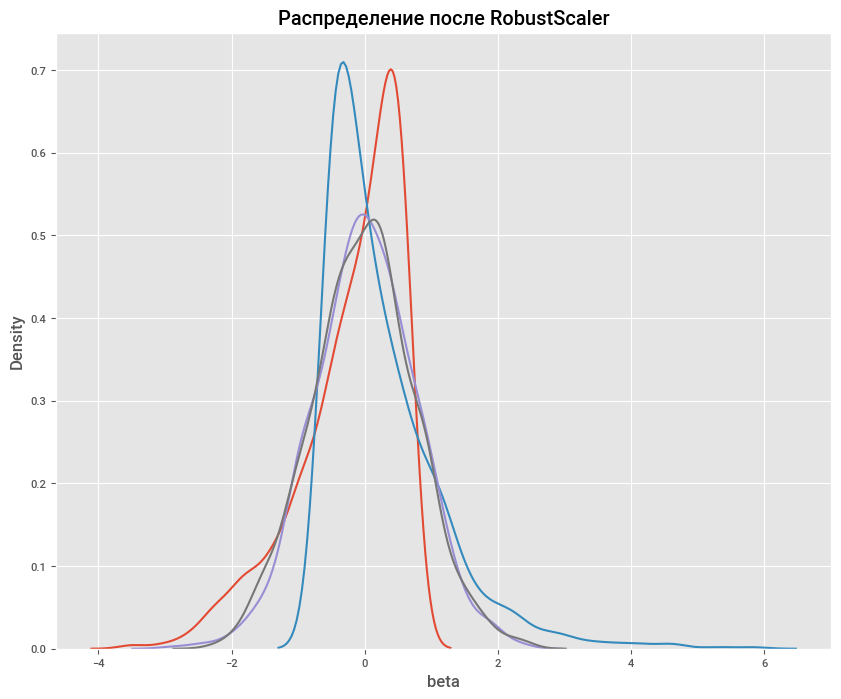

In [76]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)
# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после RobustScaler')
sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
df_r.describe()

#### <center>В чем разница?<center>
#### <center>Стандартизация<center>
#### <center>Для чего необходимо такое преобразование?<center>
#### <center>StandartScaler<center>

beta   exponential      normal_p      normal_l
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03
mean   6.075140e-16 -1.776357e-18  8.100187e-16 -2.398082e-17
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00
min   -4.270238e+00 -1.029983e+00 -3.793988e+00 -2.942457e+00
25%   -4.995057e-01 -7.274049e-01 -6.490566e-01 -6.544169e-01
50%    2.731017e-01 -3.093641e-01 -5.220134e-03  1.491105e-02
75%    7.907555e-01  4.105327e-01  6.522262e-01  6.376219e-01
max    1.176627e+00  6.302351e+00  3.090149e+00  3.158464e+00

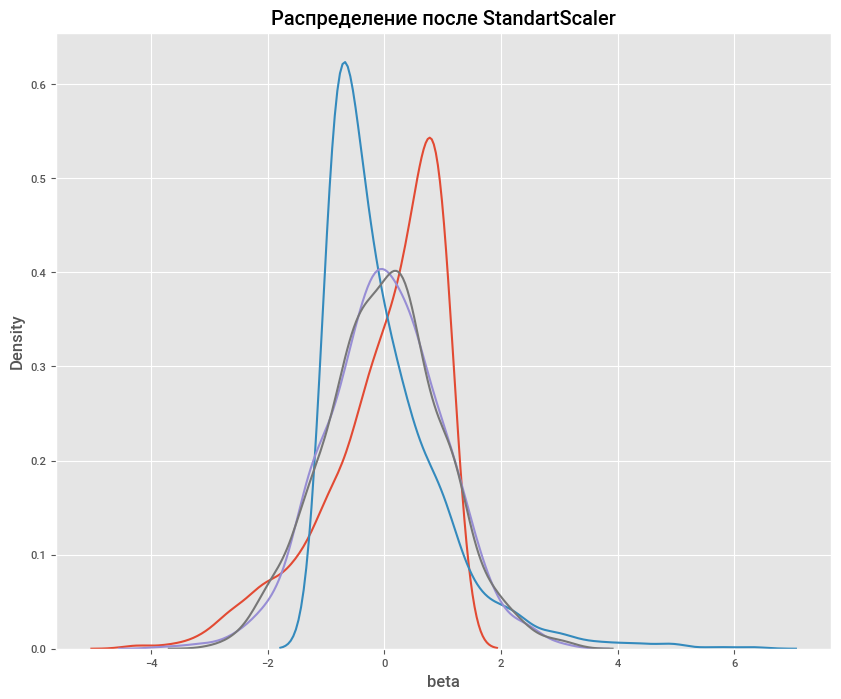

In [77]:
# инициализируем стандартизатор StandartScaler
s_scaler = preprocessing.StandardScaler()
# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)
# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после StandartScaler')
sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
df_s.describe()

#### <center>Нормализовать или стандартизировать?<center>

In [78]:
# Задание 6.4
r_wine_scaler = preprocessing.RobustScaler()
df = pd.DataFrame(wine_data['price'])
wine_r = r_wine_scaler.fit_transform(df)
display(round(wine_r.sum()))

43501

In [79]:
# Задание 6.5
s_wine_scaler = preprocessing.StandardScaler()
df = pd.read_csv('C:\IDE\data\wine_cleared.csv')
df_2 = pd.DataFrame(df['price'])
wine_s = s_wine_scaler.fit_transform(df_2)
wine_s = pd.DataFrame(wine_s, columns=['price'])
display(round(wine_s['price'][129968],2))

-0.14

### <center>7.Отбор признаков. Мультиколлинеарность<center>
#### <center>Для чего необходимо отбирать признаки?<center>
#### <center>Как понять, какие признаки больше всего влияют на предсказание?<center>

In [80]:
iris = pd.read_csv('C:\IDE\data\iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

<Axes: >

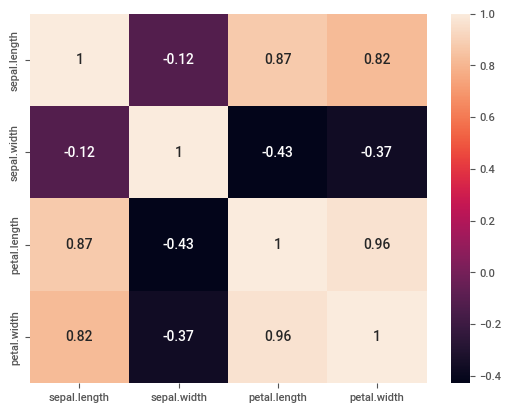

In [81]:
# Отсеиваем числовые признаки и включаем отображение коеффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [82]:
iris = iris.drop(['petal.width'], axis=1)

In [83]:
iris = iris.drop(['petal.length'], axis=1)

In [84]:
iris.head()

sepal.length  sepal.width variety
0           5.1          3.5  Setosa
1           4.9          3.0  Setosa
2           4.7          3.2  Setosa
3           4.6          3.1  Setosa
4           5.0          3.6  Setosa

#### <center>Какой признак удалять?<center>

<Axes: >

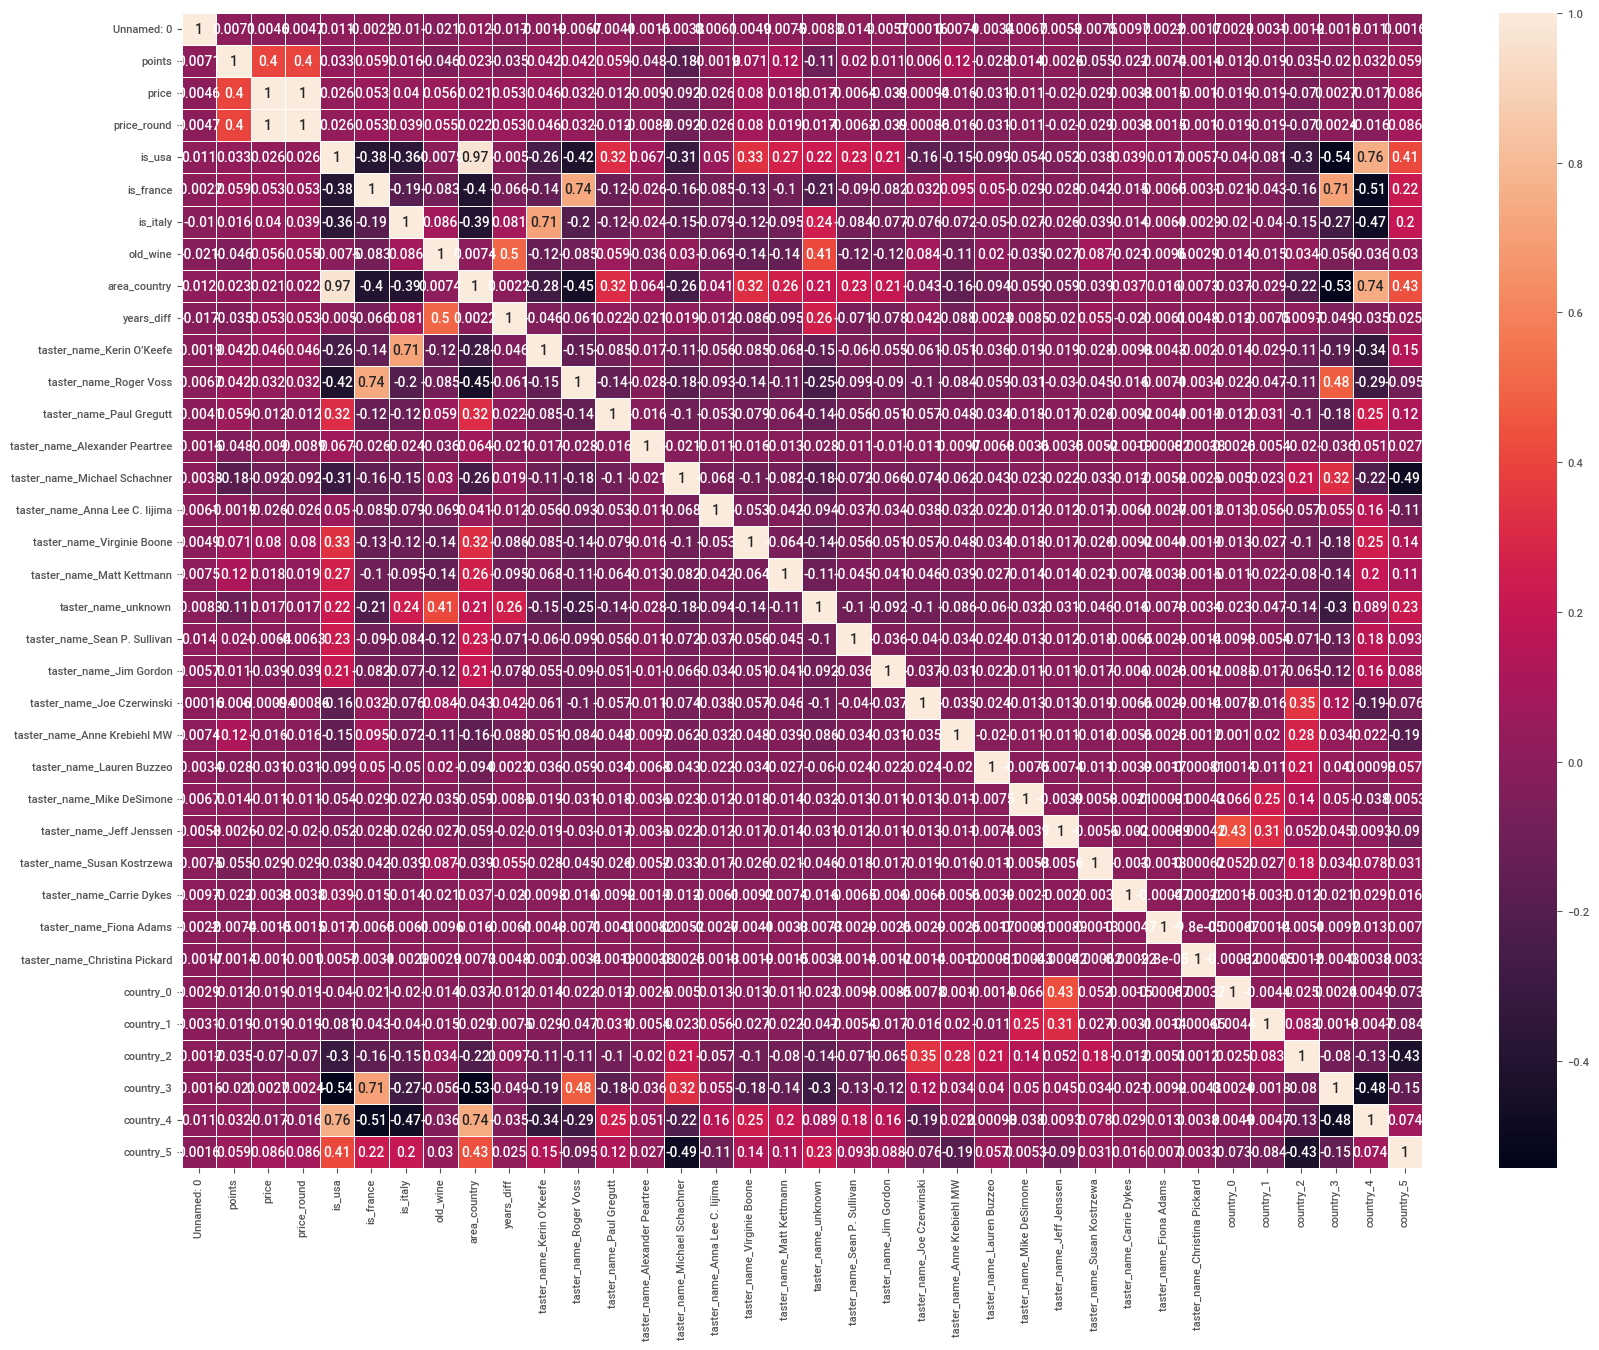

In [85]:
# Задание 7.3
wine_7_3 = pd.read_csv('C:\IDE\data\wine_cleared.csv')
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(wine_data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

In [86]:
# Задание 7.3
wine_data = wine_data.drop(['is_usa', 'is_france', 'is_italy', 'area_country', 'country_3', 'country_4'], axis=1)

<Axes: >

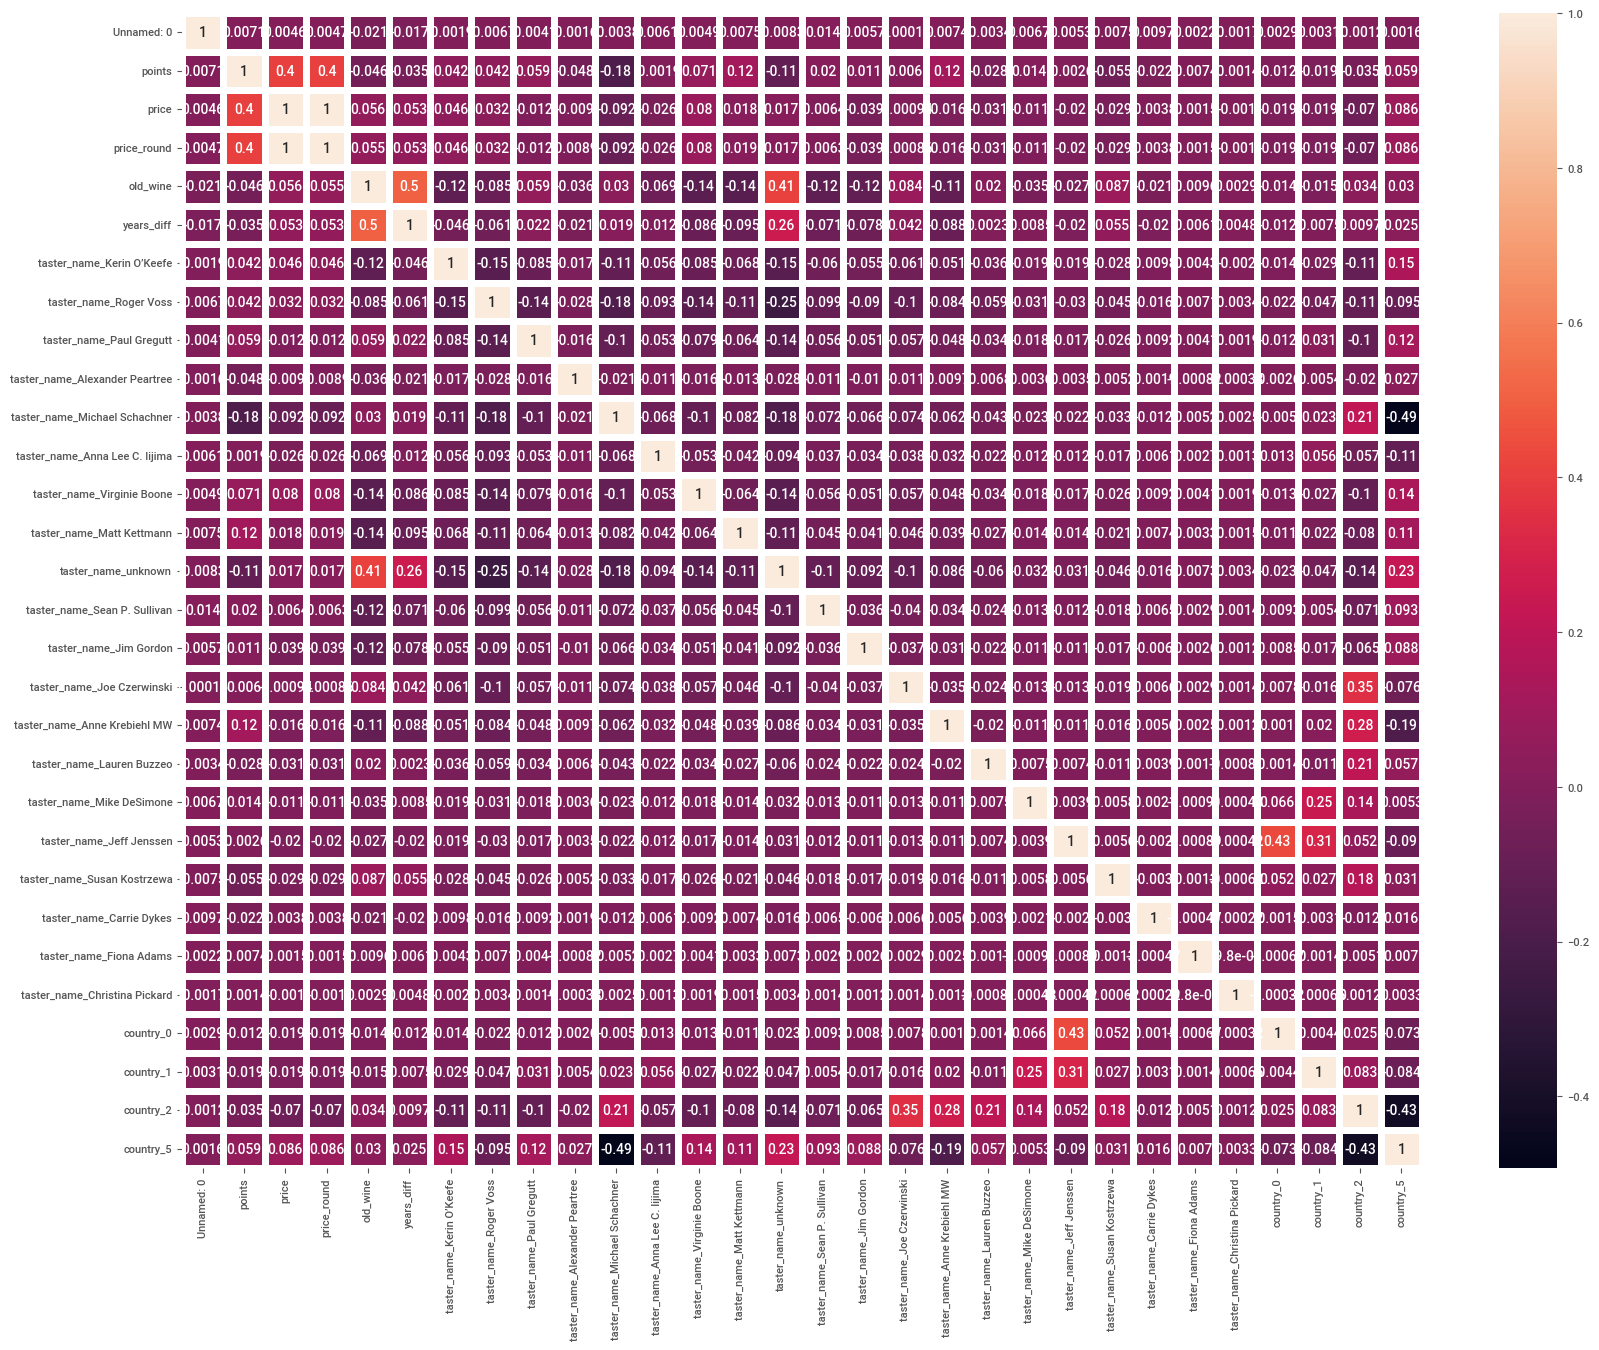

In [87]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(wine_data.corr(numeric_only=True), annot=True, linewidths=5, ax=ax)

### <center>8.Проверка знаний<center>

In [88]:
heart = pd.read_csv('C:\IDE\data\heart.csv')
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [89]:
# Задание 8.1
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

In [90]:
# Задание 8.2
def trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] < 21:
            return 123
        if 21 <= row['age'] <= 30:
            return 126
        if 31 <= row['age'] <= 40:
            return 129
        if 41 <= row['age'] <= 50:
            return 135
        if 51 <= row['age'] <= 60:
            return 142
        if row['age'] >= 61:
            return 142
        
    if row['sex'] == 0:
        if row['age'] < 21:
            return 116 
        if 21 <= row['age'] <= 30:
            return 120
        if 31 <= row['age'] <= 40:
            return 127
        if 41 <= row['age'] <= 50:
            return 137
        if 51 <= row['age'] <= 60:
            return 144
        if row['age'] >= 61:
            return 159
        
heart['trestbps_mean'] = heart[['age', 'sex']].apply(trestbps_mean, axis=1) 
print(heart['trestbps_mean'][300])

142


In [91]:
# Задание 8.3
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  trestbps_mean  
0   0     1       1    1            142  
1   0     2       1    0            129  
2   0     2       1    0            137  
3   0     2       1    0            142  
4   0     2       1    0            144

In [92]:
# Задание 8.5
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
col_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, col_bin],axis=1)
display(len(heart.columns))

35

In [93]:
heart_1 = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'],axis=1)
display(len(heart_1.columns))

30

In [94]:
heart_1.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  target  old  ...  \
0   63    1       145   233    1      150      0      2.3       1    1  ...   
1   37    1       130   250    0      187      0      3.5       1    0  ...   
2   41    0       130   204    0      172      0      1.4       1    0  ...   
3   56    1       120   236    0      178      0      0.8       1    0  ...   
4   57    0       120   354    0      163      1      0.6       1    0  ...   

   slope_3  ca_1  ca_2  ca_3  ca_4  ca_5  thal_1  thal_2  thal_3  thal_4  
0        0     1     0     0     0     0       1       0       0       0  
1        0     1     0     0     0     0       0       1       0       0  
2        0     1     0     0     0     0       0       1       0       0  
3        0     1     0     0     0     0       0       1       0       0  
4        0     1     0     0     0     0       0       1       0       0  

[5 rows x 30 columns]

In [95]:
# Задание 8.6
r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart_1)
heart_r = pd.DataFrame(heart_r, columns=heart_1.columns)
print(round(heart_r['chol'].std(),6))

0.816232


<Axes: >

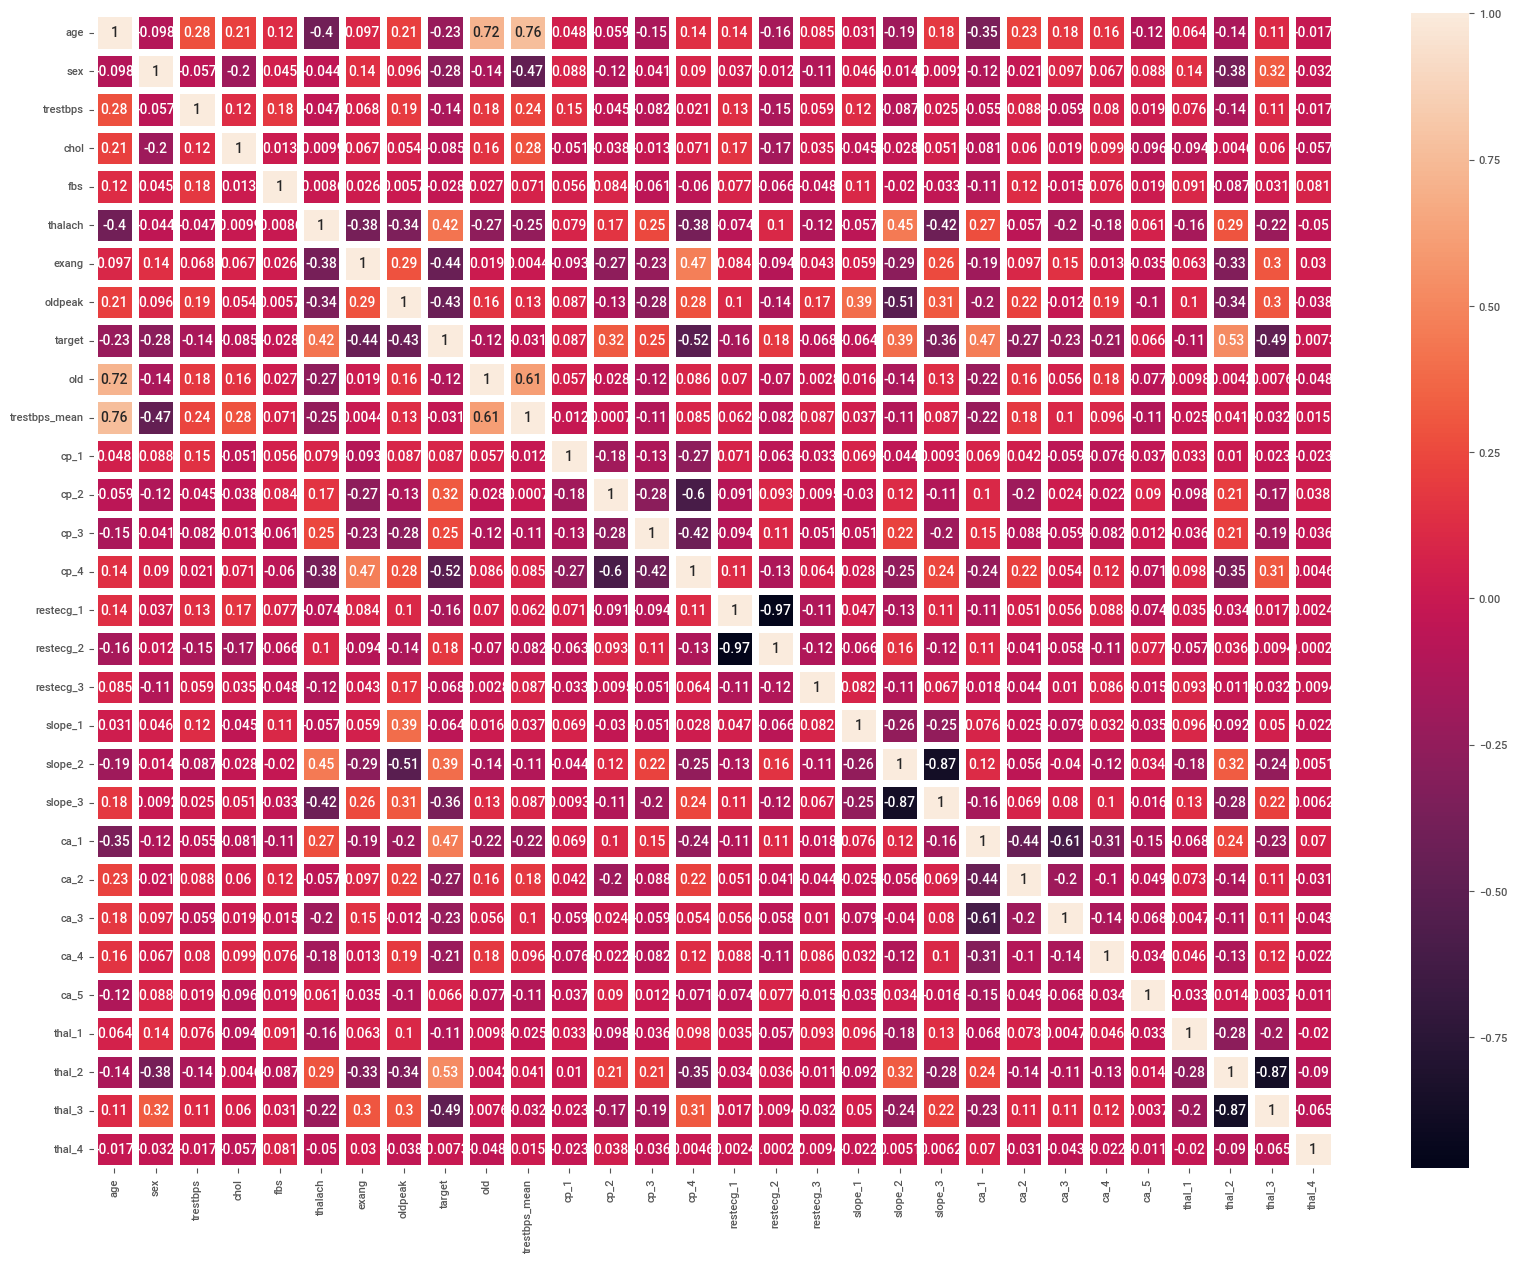

In [96]:
# Задание 8.7
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(heart_r.corr(),annot=True, linewidths=5, ax=ax)

## <center>EDA-4. Статистические тесты<center>
### <center>1.Введение<center>
### <center>2.Необходимость в статистических тестах<center>
### <center>3.Понятие статистической гипотезы<center>
#### <center>Алгоритм проверки статистических гипотез<center>
#### <center>Нулевая и альтернативная гипотезы<center>
### <center>4.Статистическая значимость<center>
#### <center>Ошибки I и II рода<center>
#### <center>Статистическая значимость (p-value)<center>
### <center>5.Статистические тесты: введение<center>
#### <center>Основные типы статистических тестов<center>
#### <center>Алгоритм выбора теста для количественных признаков<center>
### <center>6.Проверка на нормальность<center>
#### <center>Нормальное распределение<center>
#### <center>Графические методы проверки на нормальность<center>

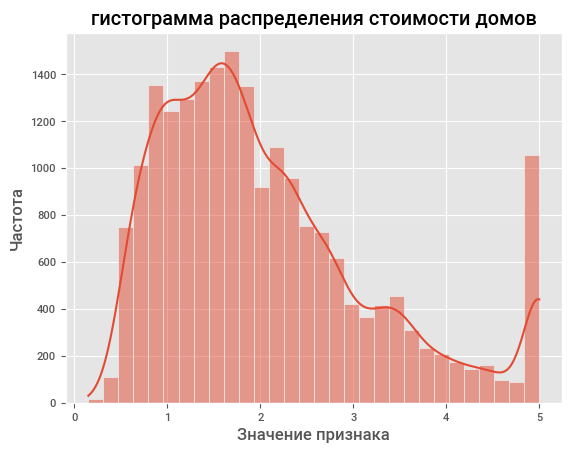

In [97]:
# импортируем библиотеки
from sklearn import datasets
from matplotlib import pyplot as plt 

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаем параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

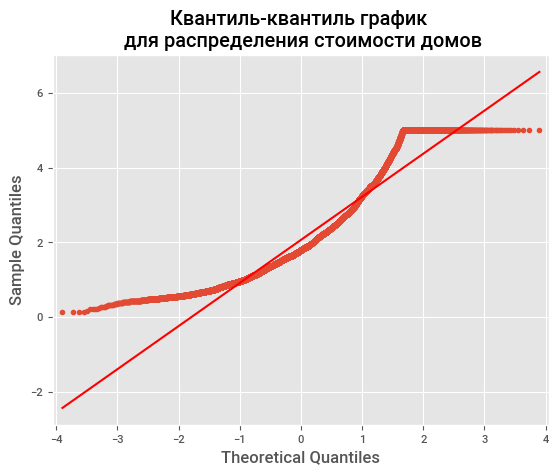

In [98]:
import statsmodels.api as sm 
# загружаем данные 
dataset = datasets.fetch_california_housing()
data = dataset.target 

# задаем параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

#### <center>Статистические методы проверки на нормальность<center>

In [99]:
import scipy.stats as stats

# задаем уровень значимости
alpha = 0.05

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро-Уилка
_, p = stats.shapiro(data)
print('p-value = %.3f' %(p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.015
Распределение не нормальное


In [100]:
# Задание 6.3
alpha = 0.05
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

_, p = stats.shapiro(data)
print('p-value = %.2f' %(p))

if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.41
Распределение нормальное


### <center>7.Параметрические тесты<center>
#### <center>Одновыборочный Т-критерий<center>

In [101]:
# задаем уровень значимости
alpha = 0.05
# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]
# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


#### <center>Двухвыборочный Т-критерий<center>

In [102]:
# задаем уровень значимости
alpha = 0.05
# загружаем данные
data_zaryad = np.array([41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42 ,34])
data_planeta = np.array([40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36])
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True')
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


#### <center>Однофакторный дисперсионный анализ (ANOVA)<center>

In [103]:
# задаем уровень значимости
alpha = 0.05
# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]
# проводим тест Левена на равенство дисперсии
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


#### <center>Парный Т-критерий<center>

In [104]:
# задаем уровень значимости
alpha = 0.05
# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])
# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


#### <center>Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями<center>

In [105]:
from statsmodels.stats.anova import AnovaRM
# задаем уровень значимости
alpha = 0.05
# создаем датасет
data = pd.DataFrame({'group':np.repeat(['Заряд', 'Планета', 'Энергия'],5),
                     'object_id': np.tile([1,2,3,4,5],3),
                     'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})
# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



In [106]:
# Задание 7.3
alpha = 0.05
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

_, p = stats.ttest_1samp(data, popmean=40, alternative='less')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Оставляем нулевую гипотезу')    

p-value = 0.018
Отвергаем нулевую гипотезу


In [107]:
# Задание 7.4
alpha = 0.05

data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

_, p = stats.f_oneway(data_north, data_south, data_east)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезу. Время доставки не равно')
else:
    print('Оставляем нулевую гипотезу. Время доставки не отличается')

p-value = 0.000
Отвергаем нулевую гипотезу. Время доставки не равно


In [108]:
# Задание 7.5
alpha = 0.05

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

_, p = stats.ttest_rel(data_after, data_before, alternative='less')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезую. Время доставки уменьшилось')
else:
    print('Оставляем нулевую гипотезу. Время доставки не изменилось')

p-value = 0.213
Оставляем нулевую гипотезу. Время доставки не изменилось


### <center>8.Непараметрические тесты<center>
#### <center>Критерий знаков (для одной группы)<center>

In [109]:
from statsmodels.stats.descriptivestats import sign_test

# задаем уровень значимости
alpha = 0.05

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергать нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


#### <center>U-критерий Манна-Уитни<center>

In [110]:
# задаем уровень значимости
alpha = 0.05

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергать нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


#### <center>Критерий Улкоксона<center>

In [111]:
# задаем уровень значимости
alpha = 0.05

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative='less')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергать нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


#### <center>Критерий Краскела-Уоллиса<center>

In [ ]:
# задаем уровень значимости
alpha = 0.05

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)
print('p-value = {:.3f}'.format(p))

# интерпертируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


2024-11-03 14:42:38,506 - INFO     - Executing shutdown due to inactivity...
2024-11-03 14:42:42,956 - INFO     - Executing shutdown...
2024-11-03 14:42:42,970 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
2024-11-03 14:42:44,415 - ERROR    - weakly-referenced object no longer exists
2024-11-03 14:42:44,417 - ERROR    - weakly-referenced object no longer exists
2024-11-03 14:42:44,419 - ERROR    - weakly-referenced object no longer exists


#### <center>Критерий Фридмана<center>

In [113]:
# задаем уровень значимости
alpha = 0.05

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергать нулевую гипотезу.'.format(alpha))
    


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [114]:
# Задание 8.3
alpha = 0.05

data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

_, p = stats.wilcoxon(data_before, data_after, alternative='less')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value = 0.742
Не отвергаем нулевую гипотезу


In [115]:
# Задание 8.4
alpha = 0.05

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

_, p = sign_test(data, 75)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value = 0.136
Не отвергаем нулевую гипотезу


In [116]:
# Задание 8.5
alpha = 0.05

data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

_, p = stats.kruskal(data_tariffs, data_offers, data_support)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value = 0.000
Отвергаем нулевую гипотезу


### <center>9.Статистические тесты для категориальных признаков<center>